# Process Globe Data

In [30]:
import pandas
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import datetime
from datetime import datetime
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

__The purpose of globe main is the following:__
1. load the dataset
2. modify the dataset to include rounded lat / long values and metric season
3. graph the data as a function of geolocation as the input and height as the output
4. convert the modified dataframe into a dictionary that maps a given tuple (lat, long) to a list of tree heights recorded at that approximate geolocation

## Load Data

In [32]:
def load():
    data = input('Please enter the file name: ')
    globe_data = pandas.read_csv(data) 
    return globe_data

## Modify Data

In [33]:
def add_season(dataframe):
    date = dataframe['Measured At'].values.tolist()
    date_l = []
    for obj in date:
        obj = obj[0:10]
        date_l.append(obj)
    rev_date_l = []
    for obj in date_l:
        my_date = datetime.strptime(obj, '%Y-%m-%d')
        rev_date_l.append(my_date)
    final_date_l = []
    for obj in rev_date_l:
        final_date_l.append(obj.month)
    season_l = []
    for obj in final_date_l:
        if obj == 12 or obj == 1 or obj == 2:
            season_l.append('Season 1')
        
        else:
            if obj == 3 or obj == 4 or obj == 5:
                season_l.append('Season 2')
            else:
                if obj == 6 or obj == 7 or obj == 8: 
                    season_l.append('Season 3')
                else:
                    if obj == 9 or obj == 10 or obj == 11:
                        season_l.append('Season 4')
    dataframe['Season'] = season_l
    return dataframe

In [34]:
def add_lat_long(data):
    lat_list = list(data['Latitude'])
    long_list = list(data['Longitude'])
    lat = []
    for item in lat_list:
        lat.append(round(item,1))
        #round all globe measurements to 1 degree of precision
    long = []
    for item in long_list:
        long.append(round(item, 1))
    data['~Latitude'] = lat
    data['~Longitude'] = long
    data.sort_values(by = '~Latitude', ascending = False)
    return data

## Visualize Data

In [35]:
def visualize(dataframe):
    lat = dataframe['Latitude'].values.tolist()
    long = dataframe['Longitude'].values.tolist()
    height = dataframe['Measured Value'].values.tolist()
    fig= plt.figure(figsize=(30,30))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(lat, long, height, c='r', marker='o')
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    ax.set_zlabel('Tree Height')
    return plt.show()

## Convert Modified Dataframe into Dictionary

_Function to convert a dataframe into a dictionary of tuples to lists_

In [41]:
def df_to_dict(df):
    lat = df['~Latitude'].tolist()
    long = df['~Longitude'].tolist()
    height = df['Measured Value'].tolist()
    loc = []
    for i in range(len(lat)):
        loc.append((lat[i], long[i]))
    #lets build a dummy dictionary
    dictionary = {}
    for item in loc:
        dictionary[item] = []
    for i in range(len(lat)):
        for key in dictionary:
            if key == loc[i]:
                val = dictionary.get(key)
                val.append(height[i])
    return dictionary

## Main Method for Globe Data

In [42]:
#the file name is 'dv_tree_heights_06-30-2020.csv'
def globe_main():
    data = load()
    data = add_season(data)
    data = add_lat_long(data)
    print(visualize(globe_data))
    dictionary = df_to_dict(data)
    return dictionary

Please enter the file name: dv_tree_heights_06-30-2020.csv


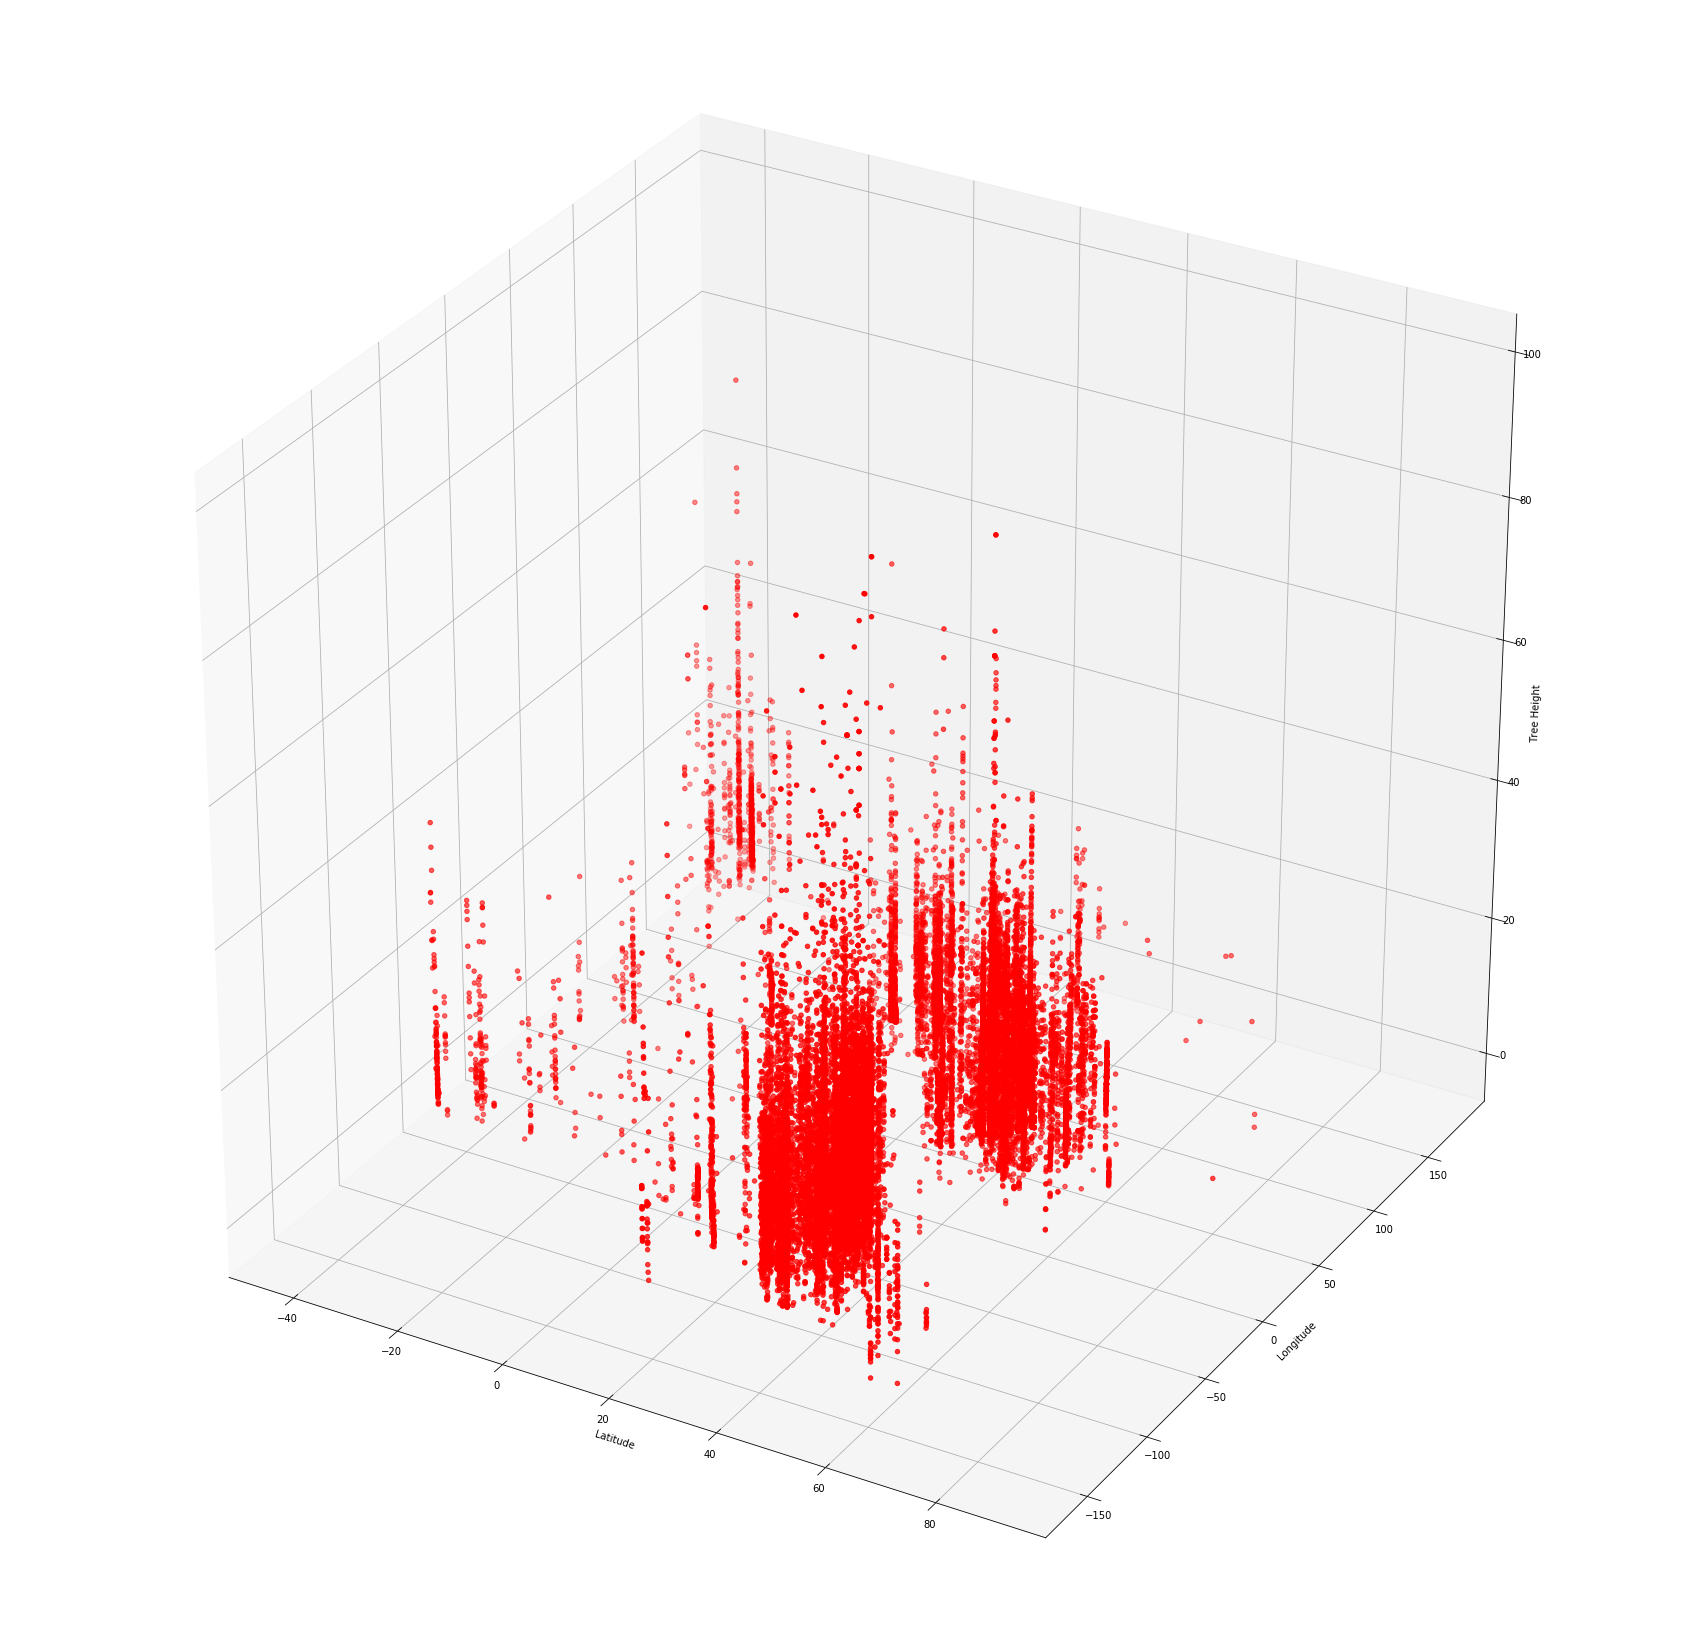

None


{(39.0, 20.8): [36.0,
  18.8,
  36.0,
  8.9,
  10.5,
  8.9,
  27.7,
  27.7,
  6.0,
  9.4,
  29.0,
  13.8,
  28.4,
  6.6,
  28.4,
  9.4,
  12.9,
  29.0,
  19.5,
  14.1,
  13.8,
  18.8,
  12.9,
  14.1,
  14.1,
  10.5,
  6.7,
  6.0,
  19.5],
 (38.0, 23.8): [20.7,
  5.9,
  22.0,
  10.0,
  9.3,
  7.4,
  10.6,
  10.7,
  4.7,
  7.5,
  11.7,
  15.39,
  17.47,
  17.0,
  25.0,
  18.0,
  23.0,
  25.0,
  32.0,
  18.0,
  25.0,
  18.0,
  32.0,
  17.0,
  29.0,
  29.0,
  26.0,
  28.0,
  26.0,
  28.0,
  18.0,
  23.0,
  26.0],
 (26.1, 56.1): [17.71,
  18.89,
  17.74,
  8.11,
  18.05,
  10.86,
  12.18,
  6.79,
  15.7,
  9.73,
  13.11,
  13.87,
  8.81,
  9.54,
  11.18,
  6.28,
  13.49,
  10.86,
  15.12,
  16.08,
  18.52,
  12.93,
  12.9,
  14.04,
  13.32,
  12.85,
  11.99,
  11.81,
  17.31,
  18.2,
  14.31,
  16.02,
  5.32,
  5.52,
  13.05,
  15.55,
  9.3,
  16.36,
  11.96,
  11.85,
  15.59,
  12.88,
  15.21,
  12.37,
  8.36,
  7.09,
  12.9,
  19.1,
  13.57,
  10.53,
  17.4,
  10.33,
  13.97,
  8.0,
  11.

In [43]:
globe_main()

# Extract ICESat-2 Data

In [ ]:
from icepyx import icesat2data as ipd
import os
import shutil
from pprint import pprint
%matplotlib inline
import h5py
import numpy as np
import os.path
import statistics
import math
from scipy import stats

__Given a dictionary that maps a series of geolocational tuples to lists of values, we need to programmatically access granules of of ICESat-2 data one tuple at a time and build corresponding lists of tree heights from these granules. We will then compare the two lists of tree heights using two-sample T-distributions. We will classify the error as high or low based on the probability that the two data sets are similar, which is determined by the sample T-statistic.__

_We need the add_string method because downloaded files have a slightly altered name from the files initially listed._

In [ ]:
def add_string(str_list):
    dummy_list = []
    for item in str_list:
        item = 'processed_' + item
        dummy_list.append(item)
    return dummy_list
#this function is simple file processing, because the downloaded file format != the list of files returned as output

In [28]:
def ice_download(key):
    lat = key[0]
    long = key[1]
    delta = 0.01
    #by experimental observation, you need a window of at least one in order to obtain enough granules for observation
    #need to make sure we do not exceed the lat, long bounds. Four edge cases to consider:
    #lat = +/- 90, long = +/- 180 
    #if any of the delta values pushes the sum out of bounds, reduce the value to just the lat or the long
    #we maintain the dimensions of 2 delta x 2 delta by readjusting during an edge case
    if (long - delta) < -180:
        entry_1 = long
        entry_3 = long + 2*delta
    else:
        if (long + delta) > 180:
            entry_1 = long - 2*delta
            entry_3 = long
        else:
            entry_1 = long - delta
            entry_3 = long + delta
    if (lat - delta) < -90:
        #boundary condtion
        entry_2 = lat
        entry_4 = lat + 2*delta
    else:
        if (lat + delta) > 90:
            entry_2 = lat - 2*delta
            entry_4 = lat
        else:
            entry_2 = lat - delta
            entry_4 = lat + delta
        
    short_name = 'ATL08'   
    spatial_extent = [entry_1, entry_2, entry_3, entry_4]
    #entry 1, entry 3 are long values --> entry 2, 4 are lat values
    date_range = ['2018-01-01','2020-06-25']
    region_a = ipd.Icesat2Data(short_name, spatial_extent, date_range)
    ice_list = region_a.avail_granules(ids=True)

    earthdata_uid = 'johnrobison22'
    email = 'c150nation@gmail.com'
    region_a.earthdata_login(earthdata_uid, email)
    
    path = 'Download'
    
# without variable subsetting, or with variable subsetting if you have run region_a.order_granules(Coverage=region_a.order_vars.wanted)
    region_a.download_granules(path)
    ice_list = add_string(ice_list)
    #add _processed in order to get string into right format
    #ice_list = check_file(ice_list)
    #add 
    return ice_list

In [26]:
def download():
    parent_list = []
    dictionary = globe_main()
    for key in dictionary:
        ice_list = ice_download(key)
        parent_list.append(ice_list)
    return parent_list

_Once we download the relevant files, we need to make sure the files actually downloaded to our computer. If the files do not download directly to your computer, you will need to go to your email and download the relevant files manually. The function check_file should be helpful in checking to see if the files downloaded correctly. If the list of files you enter does not equal the list outputted, check your email for additional zip folders._

In [27]:
def check_file(parent_list):
    file_list = []
    for item in parent_list:
        for element in item:
            if os.path.exists(element):
                file_list.append(element)
            else:
                pass
    return file_list
#file list will return all valuable files to be used     

In [29]:
def ice_retrieval(key):
    lat = key[0]
    long = key[1]
    delta = 0.01
    #by experimental observation, you need a window of at least one in order to obtain enough granules for observation
    #need to make sure we do not exceed the lat, long bounds. Four edge cases to consider:
    #lat = +/- 90, long = +/- 180 
    #if any of the delta values pushes the sum out of bounds, reduce the value to just the lat or the long
    #we maintain the dimensions of 2 delta x 2 delta by readjusting during an edge case
    if (long - delta) < -180:
        entry_1 = long
        entry_3 = long + 2*delta
    else:
        if (long + delta) > 180:
            entry_1 = long - 2*delta
            entry_3 = long
        else:
            entry_1 = long - delta
            entry_3 = long + delta
    if (lat - delta) < -90:
        #boundary condtion
        entry_2 = lat
        entry_4 = lat + 2*delta
    else:
        if (lat + delta) > 90:
            entry_2 = lat - 2*delta
            entry_4 = lat
        else:
            entry_2 = lat - delta
            entry_4 = lat + delta
        
    short_name = 'ATL08'   
    spatial_extent = [entry_1, entry_2, entry_3, entry_4]
    #entry 1, entry 3 are long values --> entry 2, 4 are lat values
    date_range = ['2018-01-01','2020-06-25']
    region_a = ipd.Icesat2Data(short_name, spatial_extent, date_range)
    ice_list = region_a.avail_granules(ids=True)

    earthdata_uid = 'johnrobison22'
    email = 'c150nation@gmail.com'
    region_a.earthdata_login(earthdata_uid, email)
    
    path = 'Download'
    
# without variable subsetting, or with variable subsetting if you have run region_a.order_granules(Coverage=region_a.order_vars.wanted)
    #region_a.download_granules(path)
    #--> in this function, we only extract available granules, we do not actually download them
    ice_list = add_string(ice_list)
    #add _processed in order to get string into right format
    #ice_list = check_file(ice_list)
    #add 
    return ice_list

_Check_file will serve as our measure against corrupted / missing files_

so the plan here is that the download step must be DISTINCT from the data processing step

_The purpose of read_file is to extract information from the hierachical HDF5 file, build a list of tree heights for each beam, and then compile a list of tree heights from each of these beams into a meta list called tree_list --> we can then run a t-test on the tree_list and some corresponding list from the globe dictionary._

In [ ]:
def read_file(item):
   
    f = h5py.File(item, 'r')
    #read each file in the data set
    tree_list = []
    beam_list = ['gt1r', 'gt1l', 'gt2r', 'gt2l', 'gt3r', 'gt3l']
    for beam in beam_list:
        for comp in list(f.items()):
            for elem in comp:
                if elem == beam:
                    laser = f.get(beam)
                    land_segments = laser.get('land_segments')
                    canopy = land_segments.get('canopy')
                    h_canopy = canopy.get('h_canopy')
                    canopy_data = h_canopy[()]
            #extracts values from canopy data
            #dataset[()]
                    can_list = canopy_data.tolist()
                    print(can_list)
                    canopy_list = []
                    for item in can_list:
                        if item < 1000:
                            canopy_list.append(item)
                    print(canopy_list)
                    tree_list = tree_list + canopy_list                   
    return tree_list

In [ ]:
def t_test(list1, list2):
    arr1 = numpy.array(list1)
    arr2 = numpy.array(list2)
    t = stats.ttest_ind(arr1, arr2)
    p = t[1]
    return p

In [ ]:
def err(p, alpha):
    if p < alpha:
        err = -1
    else: 
        if p >= alpha:
            err = 1
    return err

In [ ]:
#need to account for case of empty list
def h_canopy_err(dictionary):
    p_list = []
    err_list = []
    key_list = []
    #used to store error
    for key in dictionary:
        ice_files = ice_retrieval(key)
        #uses key to return specific bounds for ICE region
        #-->returns list of files based on region
        #used to store tree height items
        if ice_files != []:
            #make sure its not empty
            for item in ice_files:
                tree_list = read_file(item)
                if tree_list != []:
                    val = dictinary.get(key)
                    if val != []:
                        p = t_test(val, tree_list)
                        err = err(p, .05)
                        #we set the alpha value to .05 by default
                        p_list.append(p)
                        err_list.append(err)
                        key_list.append(key)
            #add this mean to a list of means
    
    return p_list, err_list, key_list

_We now have a function that takes a dictionary as input and produces the probability of likelihood and approximate error (low = -1, high = 1) associated with each key. Our next objective is to graphically represent these findings in two manners:_
1. K-means algorithm: can we derive patterns / meaningful observations from the error as a function of geolocational data?
2. Can we graph the error results on a colored grid in order to visualize, on a broader scale, high and low error within the system?

_To do this, we need to normalize the p data so it is standardized, thus allowing us to derive meaningful patterns from the magnitude and orientation of the error_

_We will also need to impose error on a larger grid of (lat, long) --> error with three color codes: red = high error, blue = low error, white = insignificant observations_

In [ ]:
def tuple_to_lists(dummy_list):
    l_one =[]
    l_two = []
    for item in dummy_list:
        obj_one = item[0]
        l_one.append(obj_one)
        obj_two = item[1]
    return l_one, l_two

In [ ]:
def df(norm, key):
    lat, long = tuple_to_lists(key_list)
    #CHECK THIS LATER FOR ORDER
    Data = {'x': lat, 'y': long, 'z': p_list  }
    #dictionary assigns x,y,z key values to lat, long, height
    df = DataFrame(Data,columns=['x','y', 'z'])
    return df

_Build a list of all possible key values_

In [18]:
def poss_keys(key_list):
    lat = np.arange(-90, 90, 0.1)
    long = np.arange(-180, 180, 0.1)
    loc = []
    for i in range(len(lat)):
        for j in range(len(long)):
            loc.append((lat[i], long[j]))
    pos = []
    for item in loc:
        val1 = round(item[0], 1)
        val2 = round(item[1], 2)
        val = (val1, val2)
        pos.append(val)
    return pos

_The function globe_err should return an array of -1s, 0s, and 1s --> by visualizing this array, we can conceptualize error within the system_

In [19]:
def glob_err(err, key, pos):
    glob_err = []
    for i in range(len(pos)):
        for j in range(len(key)):
            if pos[i] == key[j]:
                glob_err.append(err[j])
                #add on the error value from the corresponding key to the position on the larger globe error list
            else:
                glob_err.append(0)
    glob_arr = numpy.array(globe_err)
    globe_arr.reshape(3600,1800)
    return globe_arr

_norm will enable us to normalize the list of probability values_

In [20]:
#given a list, we want to normalize this list
def norm(d_list):
    mean = statistics.mean(d_list)
    std = statistics.stdev(d_list)
    m_list = []
    for element in d_list:
        item = (item - mean)/std
        m_list.append(item)
    return m_list


In [21]:
def visual(arr):
    plot = plt.matshow(arr, cmap='jet')
    ref_plot = plt.show()
    return plot, ref_plot

In [22]:
def elbow_meth_err(dataframe):
    wcss = []
    for i in range(1, 20):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=20, random_state=0)
        kmeans.fit(dataframe)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 20), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    return plt.show()

In [23]:
def k_means_algo_err(dataframe):
    kmeans = KMeans(n_clusters=5).fit(dataframe)
    centroids = kmeans.cluster_centers_
    fig= plt.figure(figsize=(25,25))
    plt.scatter(dataframe['x'], dataframe['y'],  c= kmeans.labels_.astype(float), s=200, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s = 200)
    return plt.show(), centroids

In [11]:
def main():
    globe_dict = globe_main()
    p_list, err_list, key_list = h_canopy_err(globe_dict)
    norm = norm(p_list)
    #runs k means algorithm on normalized list
    df = df(norm, key_list)
    #build a dataframe off of normalized probability values and locational keys
    print(elbow_meth_err(df))
    print(k_means_algo_err(df))
    pos = poss_keys(key_list)
    globe_err = glob_err(err_list, key_list, pos)
    print(visual(globe_err))
    #this should visualize the extent of the error across a traditonal globe 
    
    
    return None

# Optional: Subsetting for more Specificity